In [25]:
import pandas as pd
from PIL import Image
import numpy as np
import tifffile as tiff
import os
import glob
from tqdm import tqdm
from cmcrameri import cm

In [2]:
# Load the metadata CSV file
metadata_path = '/Users/laura/projects/Bio-image_analysis_school_ScadsAI/data/BBBC021_v1_image.csv'

In [3]:
metadata_df = pd.read_csv(metadata_path)

In [4]:
metadata_df

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
0,4,233,G10_s1_w1BEDC2073-A983-4B98-95E9-84466707A25D.tif,Week4/Week4_27481,G10_s1_w2DCEC82F3-05F7-4F2F-B779-C5DF9698141E.tif,Week4/Week4_27481,G10_s1_w43CD51CBC-2370-471F-BA01-EE250B14B3C8.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
1,4,234,G10_s2_w11C3B9BCC-E48F-4C2F-9D31-8F46D8B5B972.tif,Week4/Week4_27481,G10_s2_w2570437EF-C8DC-4074-8D63-7FA3A7271FEE.tif,Week4/Week4_27481,G10_s2_w400B21F33-BDAB-4363-92C2-F4FB7545F08C.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
2,4,235,G10_s3_w1F4FCE330-C71C-4CA3-9815-EAF9B9876EB5.tif,Week4/Week4_27481,G10_s3_w2194A9AC7-369B-4D84-99C0-DA809B0042B8.tif,Week4/Week4_27481,G10_s3_w4E0452054-9FC1-41AB-8C5B-D0ACD058991F.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
3,4,236,G10_s4_w1747818B4-FFA7-40EE-B0A0-6A5974AF2644.tif,Week4/Week4_27481,G10_s4_w298D4652F-B5BF-49F2-BE51-8149DF83EAFD.tif,Week4/Week4_27481,G10_s4_w42648D36D-6B77-41CD-B520-6E4C533D9ABC.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,4,473,G10_s1_w10034568D-CC12-43C3-93A9-DC3782099DD3.tif,Week4/Week4_27521,G10_s1_w2A29ED14B-952C-4BA1-89B9-4F92B6DADEB4.tif,Week4/Week4_27521,G10_s1_w4DAA2E9D1-F6E9-45FA-ADC0-D341B647A680.tif,Week4/Week4_27521,Week4_27521,G10,2,5-fluorouracil,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,9,3560,Week9_090907_F11_s4_w19580FF4D-DC3D-4BD0-93FE-...,Week9/Week9_39301,Week9_090907_F11_s4_w2DC65EC6F-BDCA-4B05-B243-...,Week9/Week9_39301,Week9_090907_F11_s4_w45699A0F4-9AEE-4CD4-8973-...,Week9/Week9_39301,Week9_39301,F11,3,DMSO,0.000
13196,9,3597,Week9_090907_G11_s1_w1EDE534D2-FCEE-4F92-A30B-...,Week9/Week9_39301,Week9_090907_G11_s1_w26A22E27F-6A81-43F5-9587-...,Week9/Week9_39301,Week9_090907_G11_s1_w4554A2BF7-0D53-4D27-BF92-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000
13197,9,3598,Week9_090907_G11_s2_w10B010F39-3B4B-4DCB-8E34-...,Week9/Week9_39301,Week9_090907_G11_s2_w2720AC778-3F85-4293-8D75-...,Week9/Week9_39301,Week9_090907_G11_s2_w49B290958-BCF2-4DDD-B0E9-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000
13198,9,3599,Week9_090907_G11_s3_w10394282C-6D3D-4E0E-9FA3-...,Week9/Week9_39301,Week9_090907_G11_s3_w24C59DB62-E99B-4284-BAD2-...,Week9/Week9_39301,Week9_090907_G11_s3_w471FE25C8-2477-456F-9D74-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000


In [5]:
# Let's look only at Week 1 to simplify our dataset
filtered_metadata = metadata_df[metadata_df['Image_PathName_DAPI'].str.contains('Week1_')]

In [6]:
# Further filter to include only filenames with "s1" in the DAPI image filenames (looking only at site 1)
filtered_metadata = filtered_metadata[filtered_metadata['Image_FileName_DAPI'].str.contains('s1')]

In [7]:
# Let's look for now only at replicates 1
filtered_metadata = filtered_metadata[filtered_metadata['Replicate'] == 1]

In [8]:
filtered_metadata

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
672,1,73,Week1_150607_C10_s1_w171173D63-FDAC-457A-9E33-...,Week1/Week1_22123,Week1_150607_C10_s1_w29DCB015C-38C2-41D2-A798-...,Week1/Week1_22123,Week1_150607_C10_s1_w48B202CFA-2040-4647-8F8B-...,Week1/Week1_22123,Week1_22123,C10,1,aphidicolin,0.003
684,1,69,Week1_150607_C09_s1_w1CC450920-31F4-45D3-B500-...,Week1/Week1_22123,Week1_150607_C09_s1_w27BEDAEBE-0D98-4D1A-A6DD-...,Week1/Week1_22123,Week1_150607_C09_s1_w4190BB82C-2D17-4263-A251-...,Week1/Week1_22123,Week1_22123,C09,1,aphidicolin,0.010
696,1,65,Week1_150607_C08_s1_w1F53B52B0-CE67-45C2-9A69-...,Week1/Week1_22123,Week1_150607_C08_s1_w25D455F3B-E5DB-44A9-85CF-...,Week1/Week1_22123,Week1_150607_C08_s1_w433CA7503-C3C0-4202-9E29-...,Week1/Week1_22123,Week1_22123,C08,1,aphidicolin,0.030
708,1,61,Week1_150607_C07_s1_w1C8C66DFB-08F8-4AAA-BB23-...,Week1/Week1_22123,Week1_150607_C07_s1_w2E533E75A-2247-476A-B195-...,Week1/Week1_22123,Week1_150607_C07_s1_w46D54AA9A-CB2C-4F47-BD09-...,Week1/Week1_22123,Week1_22123,C07,1,aphidicolin,0.100
720,1,57,Week1_150607_C06_s1_w10E977263-BE9D-4ED2-9931-...,Week1/Week1_22123,Week1_150607_C06_s1_w20B01C3F8-1CA8-442E-8965-...,Week1/Week1_22123,Week1_150607_C06_s1_w4B1ED3D57-0D79-49E4-94B7-...,Week1/Week1_22123,Week1_22123,C06,1,aphidicolin,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,1,2921,Week1_150607_C02_s1_w1ABFACD53-F9A2-4139-8EB1-...,Week1/Week1_22361,Week1_150607_C02_s1_w29414A130-7191-4B7E-B61A-...,Week1/Week1_22361,Week1_150607_C02_s1_w431C347AD-6596-426A-B8EF-...,Week1/Week1_22361,Week1_22361,C02,1,DMSO,0.000
12032,1,2961,Week1_150607_D02_s1_w105AB7990-5B18-4F15-A679-...,Week1/Week1_22361,Week1_150607_D02_s1_w297C73E52-531B-4406-834E-...,Week1/Week1_22361,Week1_150607_D02_s1_w4CA0A136A-6645-4DA7-853B-...,Week1/Week1_22361,Week1_22361,D02,1,DMSO,0.000
12036,1,3037,Week1_150607_E11_s1_w1547D9388-86B4-4D2A-85C4-...,Week1/Week1_22361,Week1_150607_E11_s1_w2067628A9-A6E6-4912-A8F8-...,Week1/Week1_22361,Week1_150607_E11_s1_w45381CCE8-6387-465D-B9E0-...,Week1/Week1_22361,Week1_22361,E11,1,DMSO,0.000
12040,1,3077,Week1_150607_F11_s1_w15D6B81BE-146D-4A68-84C7-...,Week1/Week1_22361,Week1_150607_F11_s1_w25A53438C-F6B9-4AF3-B6CD-...,Week1/Week1_22361,Week1_150607_F11_s1_w40C9E2448-B597-4452-9C48-...,Week1/Week1_22361,Week1_22361,F11,1,DMSO,0.000


In [9]:
print(f"Available compounds: {filtered_metadata['Image_Metadata_Compound'].unique()}")
print(f"Number of available compounds: {len(filtered_metadata['Image_Metadata_Compound'].unique())}")

Available compounds: ['aphidicolin' 'colchicine' 'cytochalasin B' 'doxorubicin' 'epothilone B'
 'latrunculin B' 'monastrol' 'nocodazole' 'taxol' 'AZ-A' 'AZ-H' 'AZ-I'
 'DMSO']
Number of available compounds: 13


### Create a multichannel timelapse (DNA [DAPI], F-actin, and Β-tubulin) for each of these compounds, where each timepoint is different concentration

In [10]:
# Group by compound to simulate timelapse frames based on increasing concentration
compound_groups = filtered_metadata.groupby('Image_Metadata_Compound')

In [11]:
# For each compound, we'll prepare a list of timelapse frames for demonstration
timelapse_frames = {}


for compound, group in compound_groups:
    # Extracting only the first three concentrations for simplicity
    unique_concentrations = sorted(group['Image_Metadata_Concentration'].unique()[:])
    frames = []
    for concentration in unique_concentrations:
        # Selecting the first occurrence of each concentration
        concentration_group = group[group['Image_Metadata_Concentration'] == concentration].iloc[0]
        frames.append({
            'DAPI': concentration_group['Image_FileName_DAPI'],
            'Tubulin': concentration_group['Image_FileName_Tubulin'],
            'Actin': concentration_group['Image_FileName_Actin'],
            'Concentration': concentration
        })
    timelapse_frames[compound] = frames

In [12]:
timelapse_frames.keys()

dict_keys(['AZ-A', 'AZ-H', 'AZ-I', 'DMSO', 'aphidicolin', 'colchicine', 'cytochalasin B', 'doxorubicin', 'epothilone B', 'latrunculin B', 'monastrol', 'nocodazole', 'taxol'])

In [13]:
timelapse_frames['nocodazole']

[{'DAPI': 'Week1_150607_E10_s1_w1CA7826FB-76BC-496D-9AD3-93BD9CDD6191.tif',
  'Tubulin': 'Week1_150607_E10_s1_w225625006-6AF8-45F2-A1D8-74B8F751F88F.tif',
  'Actin': 'Week1_150607_E10_s1_w4288C0B45-A218-462A-ADF9-9981999D71DB.tif',
  'Concentration': 0.001},
 {'DAPI': 'Week1_150607_E09_s1_w1B5C7A17F-3BAB-4CBC-AC5F-330FDA00BA72.tif',
  'Tubulin': 'Week1_150607_E09_s1_w2D013258C-70C2-4A4C-8E6D-88DA824429D1.tif',
  'Actin': 'Week1_150607_E09_s1_w4B88F72FD-5E35-4179-BF5C-FE59EC7C7B33.tif',
  'Concentration': 0.003},
 {'DAPI': 'Week1_150607_E08_s1_w1CEEA4B32-8E5E-4A7E-96B4-7DBA712707EE.tif',
  'Tubulin': 'Week1_150607_E08_s1_w216AE8CA6-1EE1-4051-9BEB-FEC620076A83.tif',
  'Actin': 'Week1_150607_E08_s1_w4FB151688-AE38-4413-9B96-CF3F90C1046B.tif',
  'Concentration': 0.01},
 {'DAPI': 'Week1_150607_E07_s1_w13C94606D-7D62-433B-9FC8-6866ED66FE56.tif',
  'Tubulin': 'Week1_150607_E07_s1_w28793CA02-5665-40C7-AD77-B506FFD23023.tif',
  'Actin': 'Week1_150607_E07_s1_w4DBE94139-AD8E-4552-9A3F-B3C4890EDF7

In [14]:
data_path = "/Users/laura/projects/Bio-image_analysis_school_ScadsAI/data"
save_path = "/Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset"

def open_image(file_name):
    # Construct a search pattern to look for the file across all subfolders
    search_pattern = os.path.join(data_path, '*', file_name)
    file_list = glob.glob(search_pattern)  # Find all matching files
    
    if not file_list:
        raise FileNotFoundError(f"File {file_name} not found in any subdirectory under {data_path}.")
    
    return Image.open(file_list[0])

def normalize_image(image):
    """ Normalize the image data to [0, 1] """
    image_min = image.min()
    image_max = image.max()
    return (image - image_min) / (image_max - image_min)


for compound, frames in tqdm(timelapse_frames.items()):
    multichannel_images = []

    for frame in frames:
        # Load images for DAPI, Tubulin, and Actin channels
        dapi_image = open_image(frame['DAPI'])
        tubulin_image = open_image(frame['Tubulin'])
        actin_image = open_image(frame['Actin'])

        # Convert images to arrays for merging
        dapi_array = normalize_image(np.array(dapi_image))
        tubulin_array = normalize_image(np.array(tubulin_image))
        actin_array = normalize_image(np.array(actin_image))

        # Stack arrays along a new dimension to create a multichannel image
        # Order of channels in the stack can be adjusted based on visualization preferences
        multichannel_array = np.stack([tubulin_array, actin_array, dapi_array], axis=-1)

        multichannel_images.append(multichannel_array)

    # Save the sequence of multichannel images as a TIFF stack (timelapse)
    timelapse_filename = f"{compound}_timelapse.tif"
    tiff.imwrite(os.path.join(save_path, timelapse_filename), [np.array(img) for img in multichannel_images], photometric='rgb')

    print(f"Saved timelapse for {compound} to {os.path.join(save_path, timelapse_filename)}.")

  8%|██████████▍                                                                                                                             | 1/13 [00:00<00:06,  1.72it/s]

Saved timelapse for AZ-A to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/AZ-A_timelapse.tif.


 15%|████████████████████▉                                                                                                                   | 2/13 [00:01<00:06,  1.80it/s]

Saved timelapse for AZ-H to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/AZ-H_timelapse.tif.


 31%|█████████████████████████████████████████▊                                                                                              | 4/13 [00:02<00:04,  1.93it/s]

Saved timelapse for AZ-I to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/AZ-I_timelapse.tif.
Saved timelapse for DMSO to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/DMSO_timelapse.tif.


 38%|████████████████████████████████████████████████████▎                                                                                   | 5/13 [00:02<00:03,  2.03it/s]

Saved timelapse for aphidicolin to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/aphidicolin_timelapse.tif.


 46%|██████████████████████████████████████████████████████████████▊                                                                         | 6/13 [00:03<00:03,  2.00it/s]

Saved timelapse for colchicine to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/colchicine_timelapse.tif.


 54%|█████████████████████████████████████████████████████████████████████████▏                                                              | 7/13 [00:03<00:03,  1.91it/s]

Saved timelapse for cytochalasin B to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/cytochalasin B_timelapse.tif.


 62%|███████████████████████████████████████████████████████████████████████████████████▋                                                    | 8/13 [00:04<00:02,  1.74it/s]

Saved timelapse for doxorubicin to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/doxorubicin_timelapse.tif.


 69%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 9/13 [00:04<00:02,  1.81it/s]

Saved timelapse for epothilone B to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/epothilone B_timelapse.tif.


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 10/13 [00:05<00:01,  1.84it/s]

Saved timelapse for latrunculin B to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/latrunculin B_timelapse.tif.


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 11/13 [00:06<00:01,  1.70it/s]

Saved timelapse for monastrol to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/monastrol_timelapse.tif.


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 12/13 [00:06<00:00,  1.64it/s]

Saved timelapse for nocodazole to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/nocodazole_timelapse.tif.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.75it/s]

Saved timelapse for taxol to /Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset/taxol_timelapse.tif.


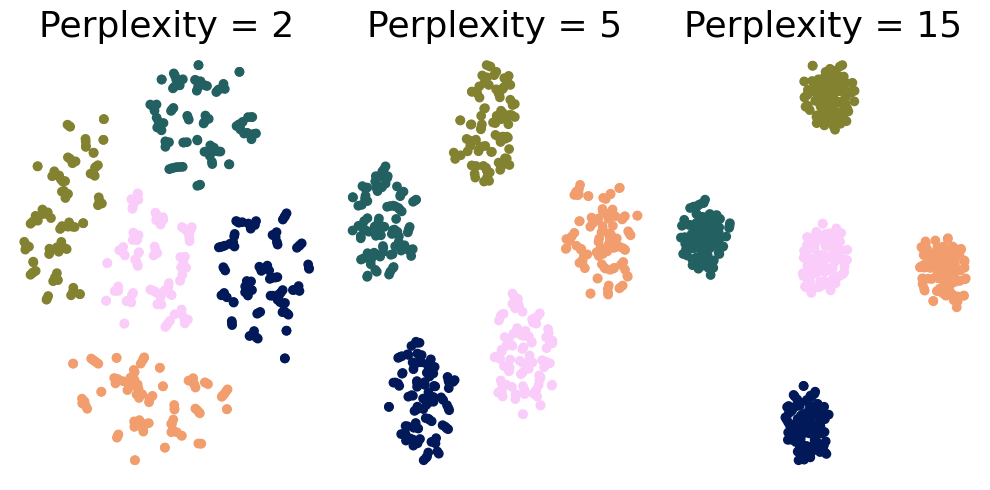

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Step 1: Generate a sample dataset
n_samples = 500
n_features = 10
n_clusters = 5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Step 2: Apply t-SNE with different perplexity values
perplexities = [2, 5, 15]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results[perplexity] = tsne.fit_transform(X)

# Step 3: Plot the results
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for ax, perplexity in zip(axes, perplexities):
    scatter = ax.scatter(tsne_results[perplexity][:, 0], tsne_results[perplexity][:, 1], c=y, cmap=cm.batlow)
    ax.set_title(f'Perplexity = {perplexity}', fontsize=26)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

plt.tight_layout()
plt.savefig("/Users/laura/Downloads/perplexity.png")
plt.show()


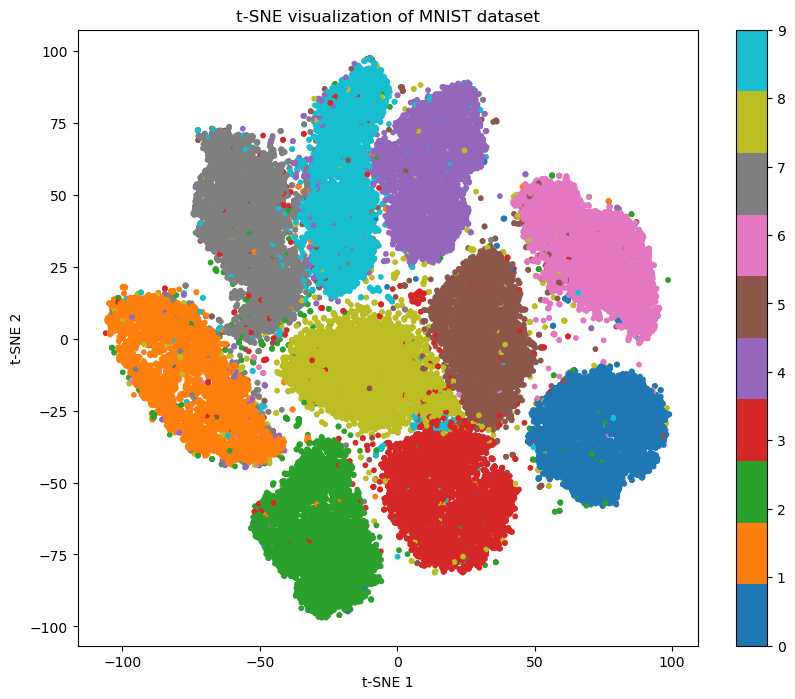

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Select a subset of the dataset
num_samples = 70000
indices = np.random.choice(len(mnist.data), num_samples, replace=False)
X_subset = mnist.data.iloc[indices].values
y_subset = mnist.target.iloc[indices].astype(int)

# Apply t-SNE to the subset
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', s=10)
plt.colorbar(scatter)
plt.title('t-SNE visualization of MNIST dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


/var/folders/gn/h45356j57bs_gzpwvw6kkbn40000gn/T/ipykernel_91923/275149631.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(i / 9), label=str(i))


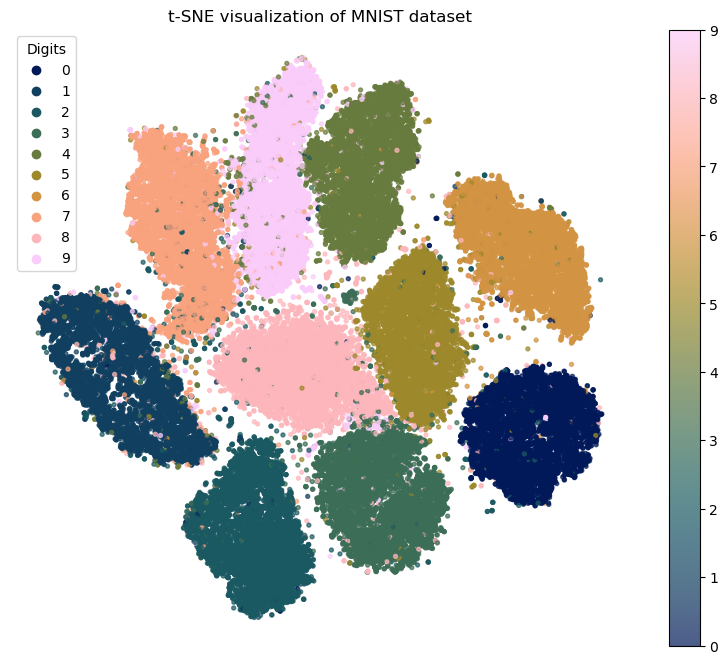

In [37]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap=cm.batlow, s=8, alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE visualization of MNIST dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.axis('off')

# Add a legend to the right
unique_labels = np.unique(y_subset)
for i in unique_labels:
    plt.scatter([], [], c=scatter.cmap(i / 9), label=str(i))
plt.legend(title="Digits")

plt.gca().collections[0].colorbar = None

plt.savefig("/Users/laura/Downloads/mnist.png")
plt.show()

/var/folders/gn/h45356j57bs_gzpwvw6kkbn40000gn/T/ipykernel_91923/353009687.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(i / 9), label=str(i))


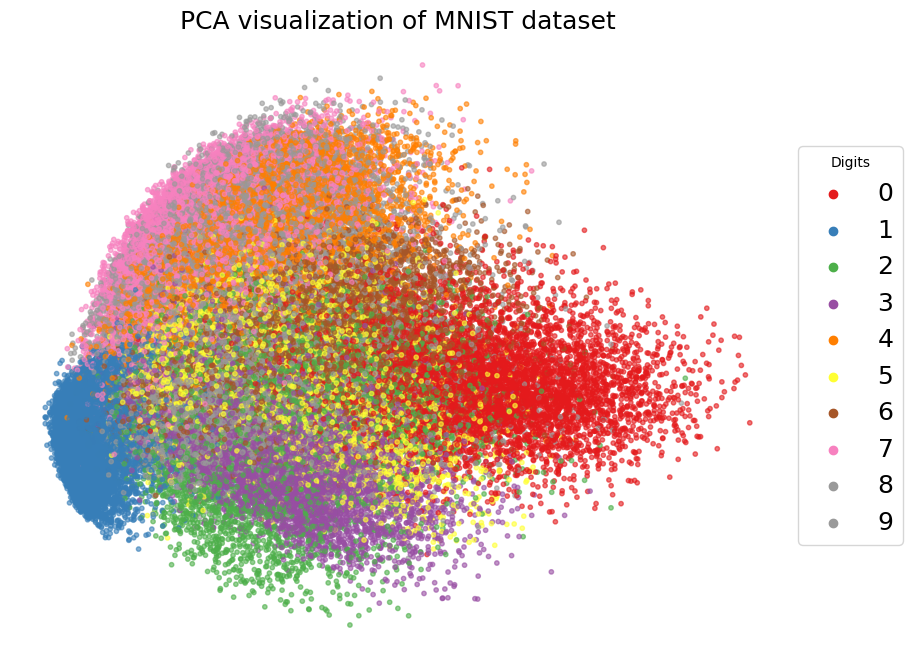

In [60]:
from sklearn.decomposition import PCA

# Apply PCA to the subset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# Plot the PCA results with a legend
plt.figure(figsize=(10, 8))

# Create a scatter plot with different colors for each digit
# for i in np.unique(y_subset):
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset,  s=10, alpha=0.6, cmap='Set1')
    #plt.scatter(X_pca[y_subset == i, 0], X_pca[y_subset == i, 1], label=str(i), s=10, c=y_subset)

plt.title('PCA visualization of MNIST dataset', fontsize=18)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.axis('off')

unique_labels = np.unique(y_subset)
for i in unique_labels:
    plt.scatter([], [], c=scatter.cmap(i / 9), label=str(i))
plt.legend(title="Digits", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

#plt.savefig("/Users/laura/Downloads/mnist_pca.png", bbox_inches='tight', dpi=300)
plt.show()